In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
superstore_data = pd.read_excel('superstore.xlsx')
print(superstore_data)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      20847           High      0.01        2.84           0.93            3   
1      20228  Not Specified      0.02      500.98          26.00            5   
2      21776       Critical      0.06        9.48           7.29           11   
3      24844         Medium      0.09       78.69          19.99           14   
4      24846         Medium      0.08        3.28           2.31           14   
...      ...            ...       ...         ...            ...          ...   
1947   19842           High      0.01       10.90           7.46         3397   
1948   19843           High      0.10        7.99           5.03         3397   
1949   26208  Not Specified      0.08       11.97           5.81         3399   
1950   24911         Medium      0.10        9.38           4.93         3400   
1951   25914           High      0.10      105.98          13.99         3403   

          Customer Name    

In [ ]:
# check for missing data 

In [14]:
# Data Cleaning
# Fill missing values in 'Product Base Margin' with the median of the column
superstore_data['Product Base Margin'].fillna(superstore_data['Product Base Margin'].median(), inplace=True)


In [15]:
# Customer Segmentation Analysis
segment_analysis = superstore_data.groupby('Customer Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Total Orders'}).reset_index()

In [16]:
# Product Performance Analysis
product_performance = superstore_data.groupby(['Product Category', 'Product Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity ordered new': 'sum'
}).rename(columns={'Quantity ordered new': 'Total Quantity Sold'}).reset_index().sort_values(by='Sales', ascending=False)


In [17]:
# Sales Trends Analysis
superstore_data['Order Month-Year'] = superstore_data['Order Date'].dt.to_period('M')
sales_trends = superstore_data.groupby('Order Month-Year').agg({
    'Sales': 'sum'
}).reset_index()
sales_trends['Order Month-Year'] = sales_trends['Order Month-Year'].astype(str)

In [18]:
# Geographical Analysis
geo_analysis = superstore_data.groupby(['Region', 'State or Province']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Total Orders'}).reset_index().sort_values(by='Sales', ascending=False)

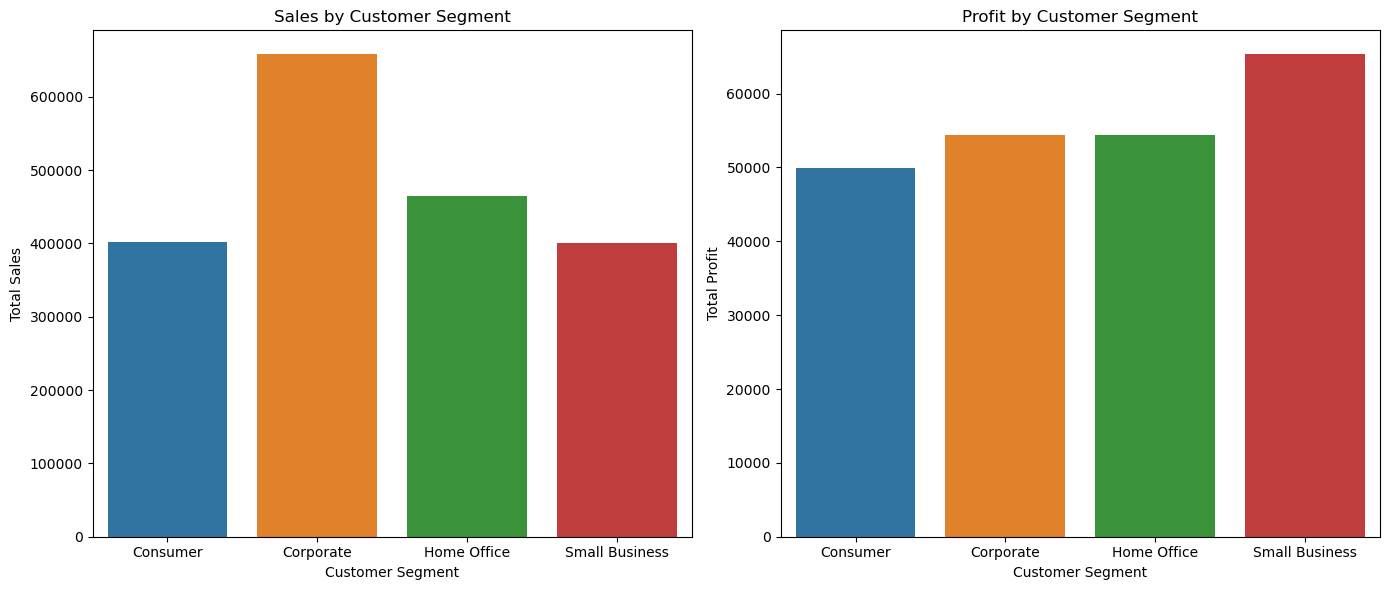

In [19]:
# Visualizations
# Customer Segmentation Analysis Visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Customer Segment', y='Sales', data=segment_analysis)
plt.title('Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Customer Segment')
plt.subplot(1, 2, 2)
sns.barplot(x='Customer Segment', y='Profit', data=segment_analysis)
plt.title('Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

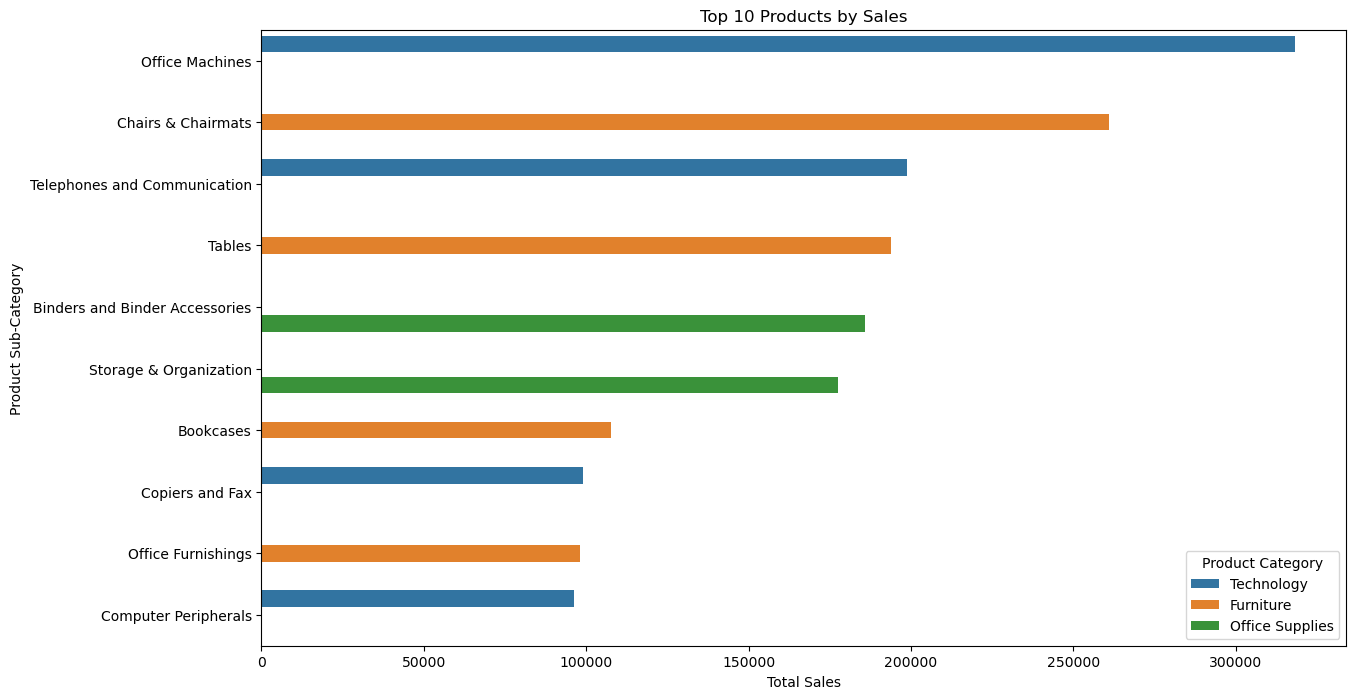

In [20]:
# Product Performance Analysis Visualization
plt.figure(figsize=(14, 8))
top_products_sales = product_performance.nlargest(10, 'Sales')
sns.barplot(x='Sales', y='Product Sub-Category', hue='Product Category', data=top_products_sales)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Sub-Category')
plt.legend(title='Product Category')
plt.show()

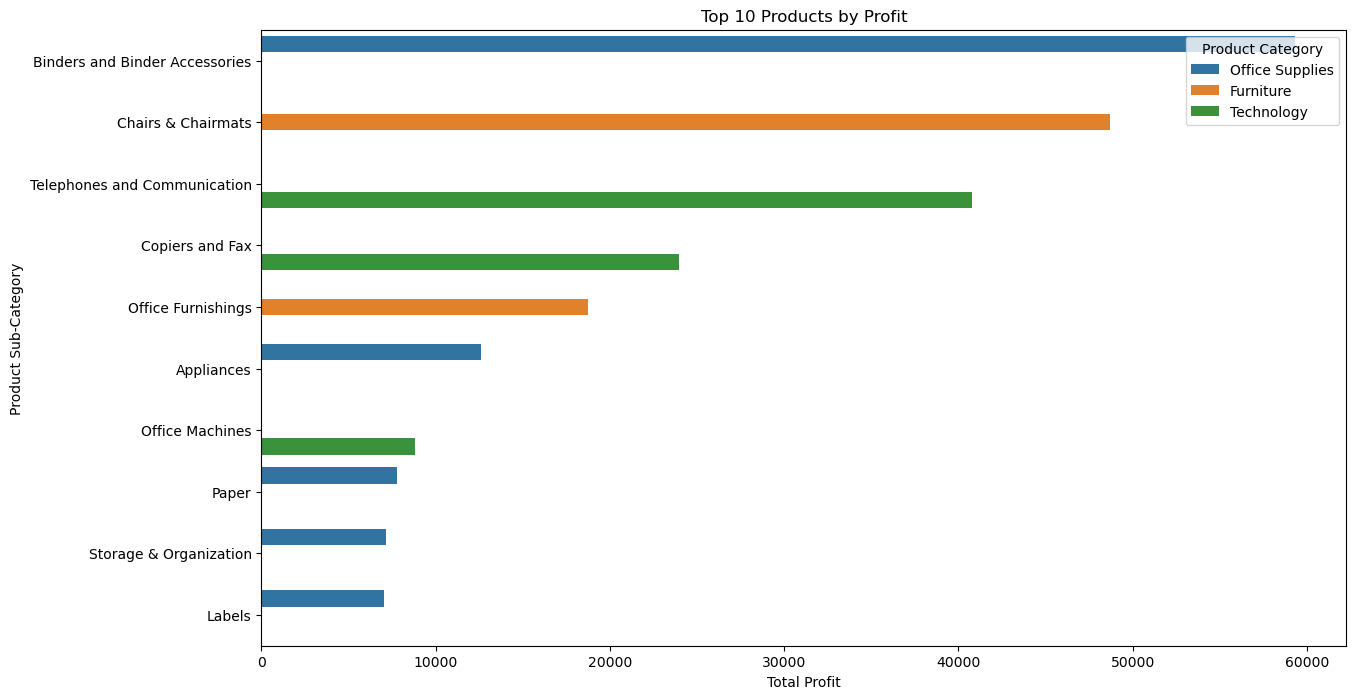

In [21]:
plt.figure(figsize=(14, 8))
top_products_profit = product_performance.nlargest(10, 'Profit')
sns.barplot(x='Profit', y='Product Sub-Category', hue='Product Category', data=top_products_profit)
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Sub-Category')
plt.legend(title='Product Category')
plt.show()

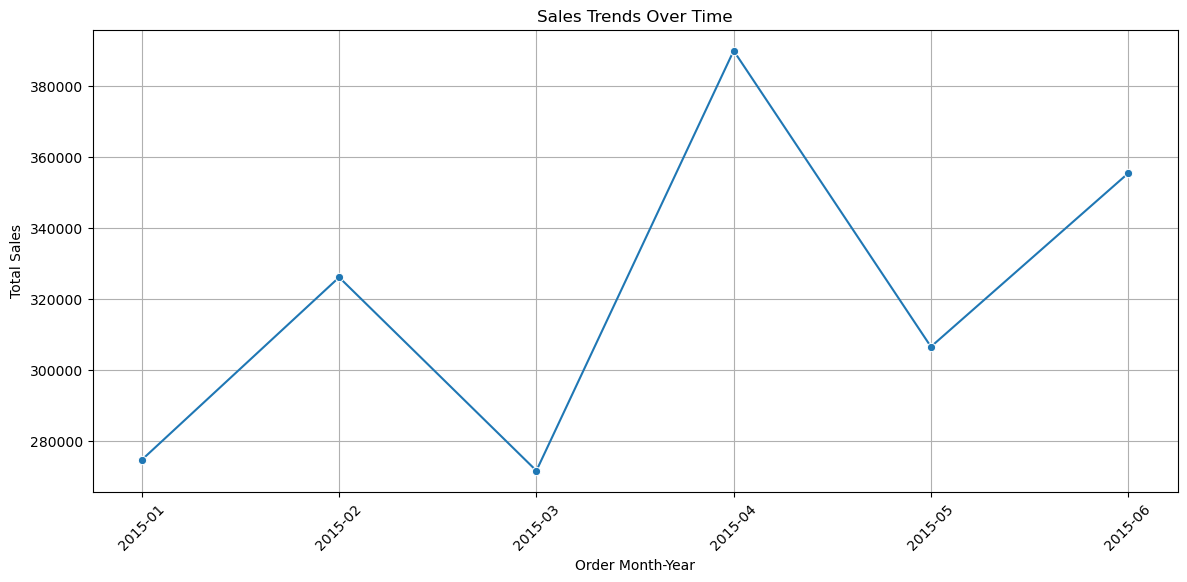

In [22]:
# Sales Trends Analysis Visualization
plt.figure(figsize=(14, 6))
sns.lineplot(x='Order Month-Year', y='Sales', data=sales_trends, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

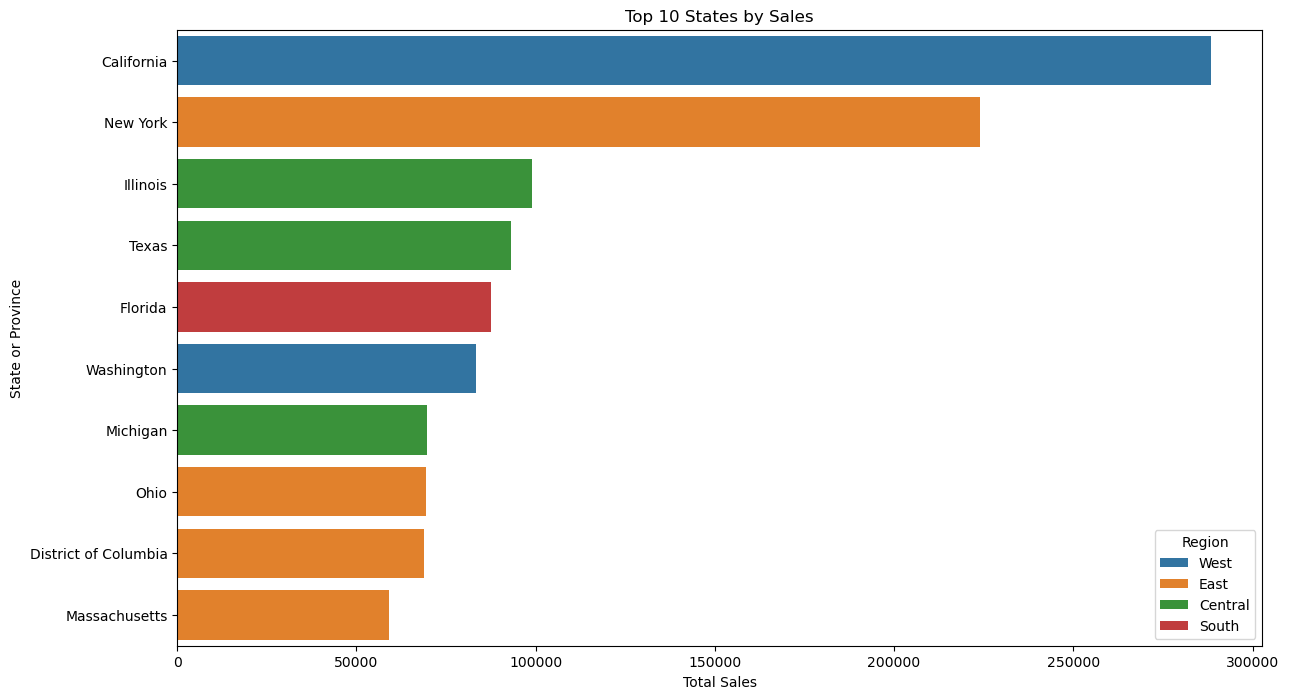

In [23]:
# Geographical Analysis Visualization
plt.figure(figsize=(14, 8))
top_regions_states_sales = geo_analysis.nlargest(10, 'Sales')
sns.barplot(x='Sales', y='State or Province', hue='Region', data=top_regions_states_sales, dodge=False)
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State or Province')
plt.legend(title='Region')
plt.show()

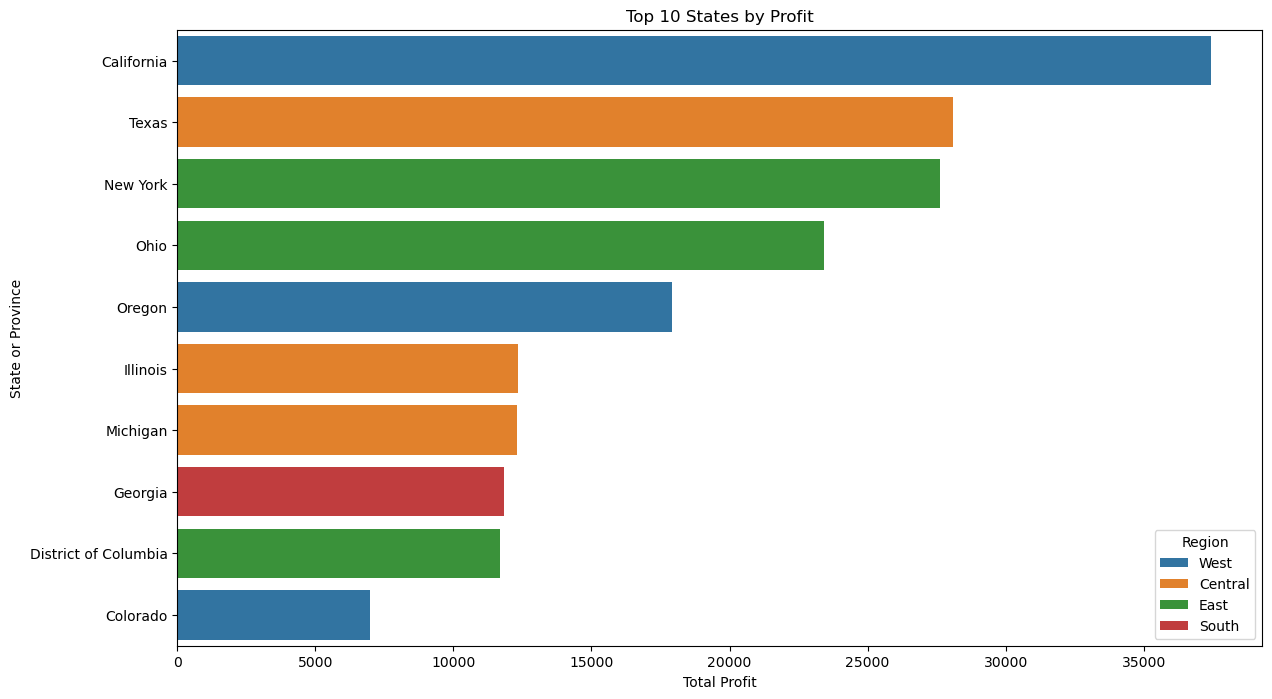

In [24]:
plt.figure(figsize=(14, 8))
top_regions_states_profit = geo_analysis.nlargest(10, 'Profit')
sns.barplot(x='Profit', y='State or Province', hue='Region', data=top_regions_states_profit, dodge=False)
plt.title('Top 10 States by Profit')
plt.xlabel('Total Profit')
plt.ylabel('State or Province')
plt.legend(title='Region')
plt.show()